In [0]:
%matplotlib inline

[[ 0.0625  -1.      -0.5     -0.75    -1.5     -1.5      0.28125 -1.
  -0.375   -0.0625   0.125    0.03125  0.125   -0.75    -0.5625   0.125
   0.25     0.375    0.09375  0.09375  0.09375  0.09375  0.09375  0.09375
   0.09375  0.09375  0.09375]
 [ 0.03125 -0.      -0.03125 -0.09375 -0.375   -0.125    0.125   -0.03125
   0.0625   0.09375  0.09375  0.09375  0.09375  0.09375  0.09375  0.09375
   0.09375  0.09375  0.25     0.125   -0.       0.28125  0.5      0.1875
  -0.125   -0.03125  0.25   ]
 [-0.0625   0.0625  -0.09375 -0.03125 -0.03125  0.1875  -0.1875  -0.
  -0.       0.09375  0.09375  0.09375  0.09375  0.09375  0.09375  0.09375
   0.09375  0.09375 -0.25     0.09375 -0.09375  0.28125  0.125   -0.
   0.09375 -0.03125  0.     ]]


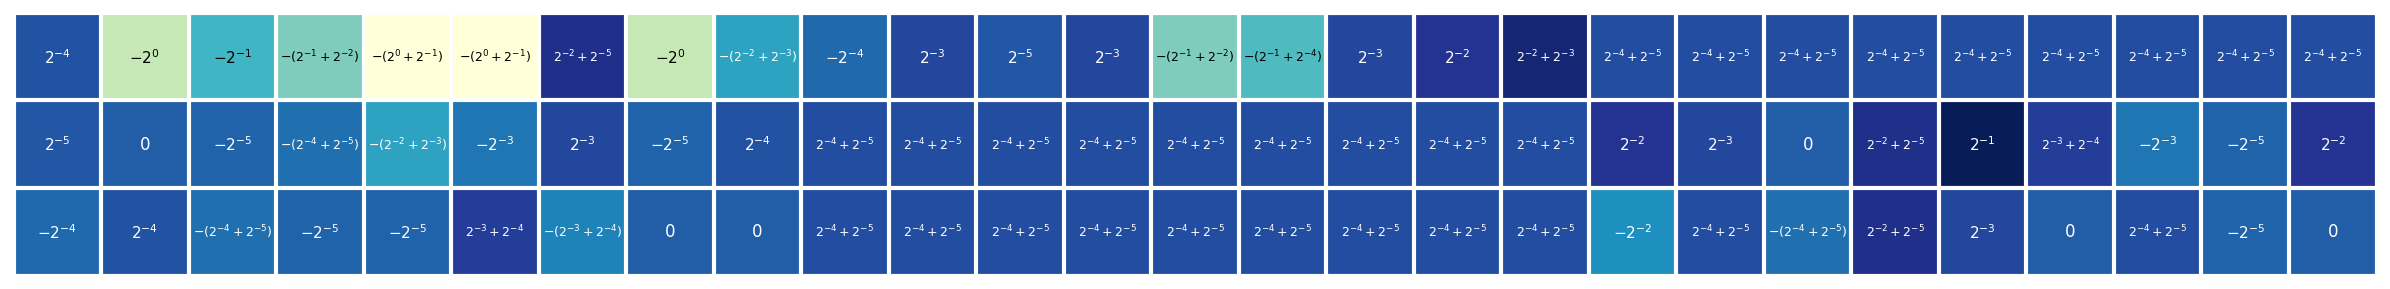

In [20]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import torch
import torch.nn as nn
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
from models.resnet import *
from models.quant_layer import QuantConv2d, build_power_value, power_quantization, uniform_quantization
from visualize import heatmap, annotate_heatmap, find_apot_level

model = resnet18()
checkpoint = torch.load('res18_5bit.pth.tar', map_location='cpu')          # load checkpoint into cpu
state_dict = {k.replace('module.', ''): v for k, v in checkpoint.items()}
model.load_state_dict(state_dict)
weights_q_matrix = None
alpha = None
for m in model.modules():                                                    # load weights in the first quantized layer
    if isinstance(m, QuantConv2d):
        weights_q_matrix = m.weight_quant(m.weight.data)
        weights_q_matrix = weights_q_matrix.div(m.weight_quant.wgt_alpha.item())*1.5
        alpha = m.weight_quant.wgt_alpha.item()
        break
weights_q_matrix = weights_q_matrix[0][0:9].reshape(3,27).detach().numpy() # select the first n elements in the first kernal
print(weights_q_matrix)

fig, ax = plt.subplots(figsize=[24,4], dpi=100)
im= heatmap(weights_q_matrix, 3, 27, ax=ax,
                   cmap='YlGnBu') # "YlGn"
texts = annotate_heatmap(im, valfmt="{x:.1f} t")

fig.tight_layout()
# plt.savefig('weight_visual.png')
plt.show()